C:\Users\hehey\AppData\Local\Temp\ipykernel_39272\1264984958.py:21: RuntimeWarning: divide by zero encountered in log10
  results_db = 10 * np.log10(results)


Minimum dB value: -inf
Corresponding x: 0
Corresponding y: 25 (log2(y) = 4.643856189774724)
Corresponding z: 5


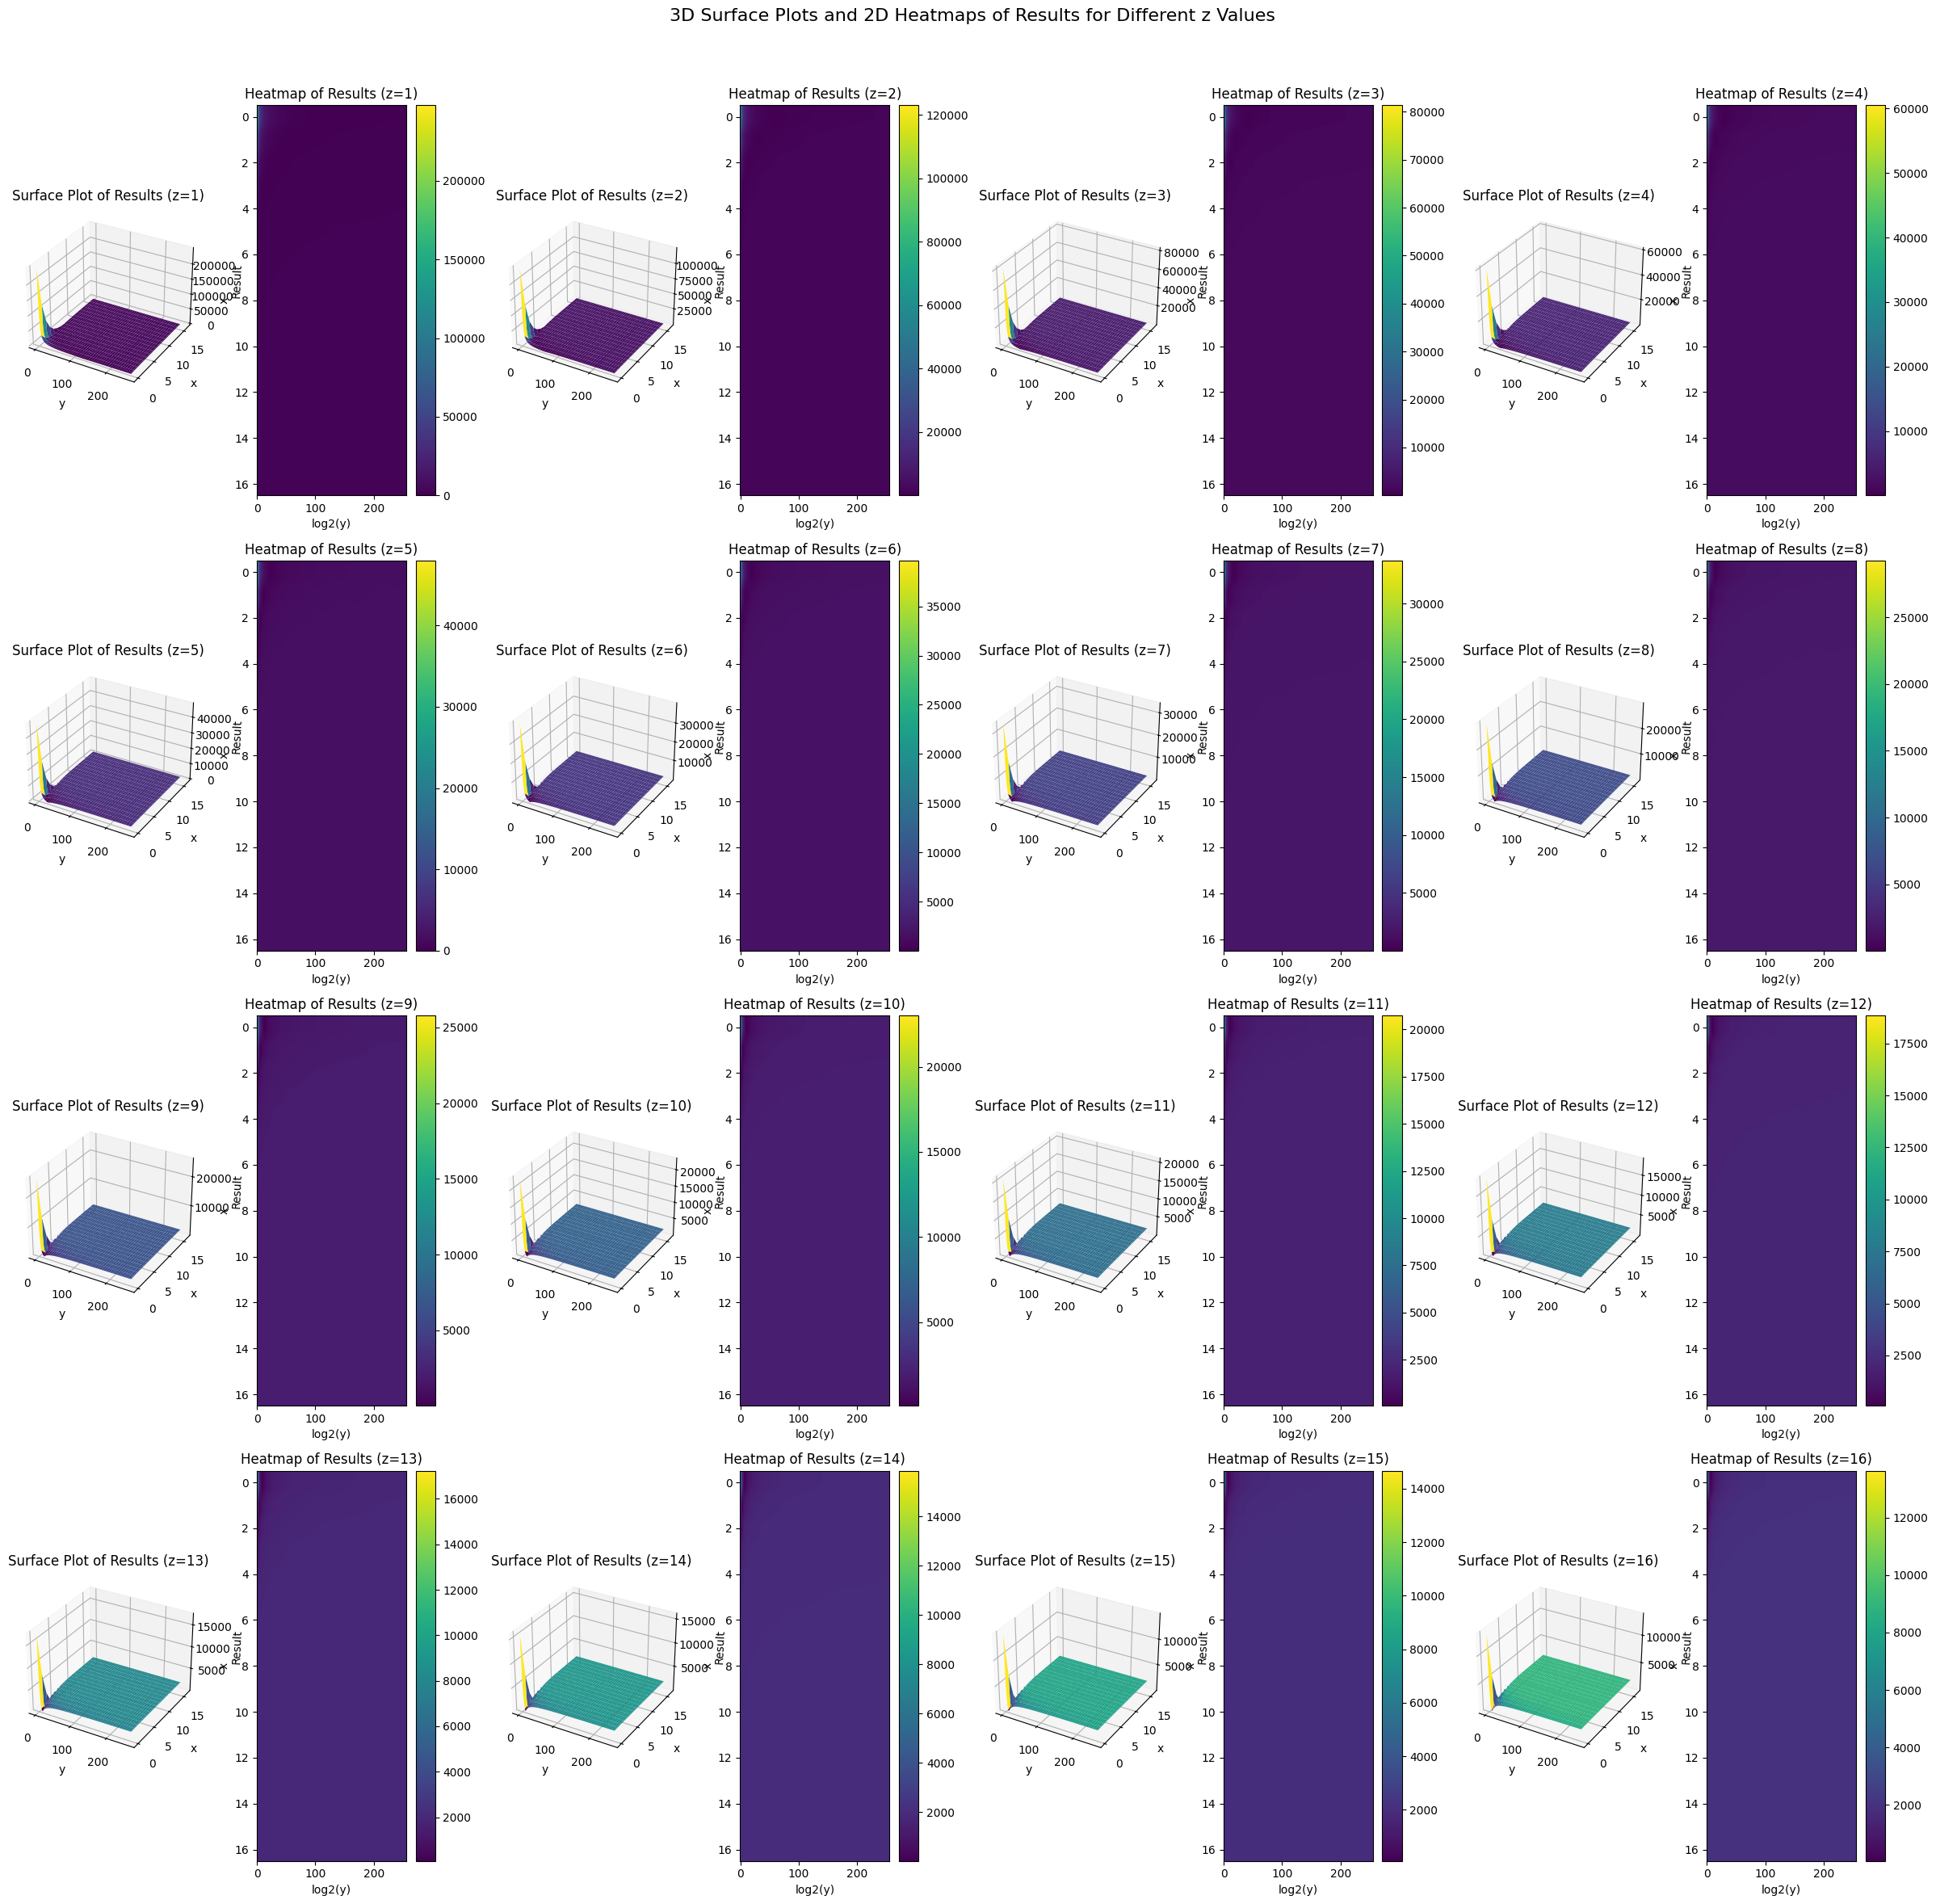

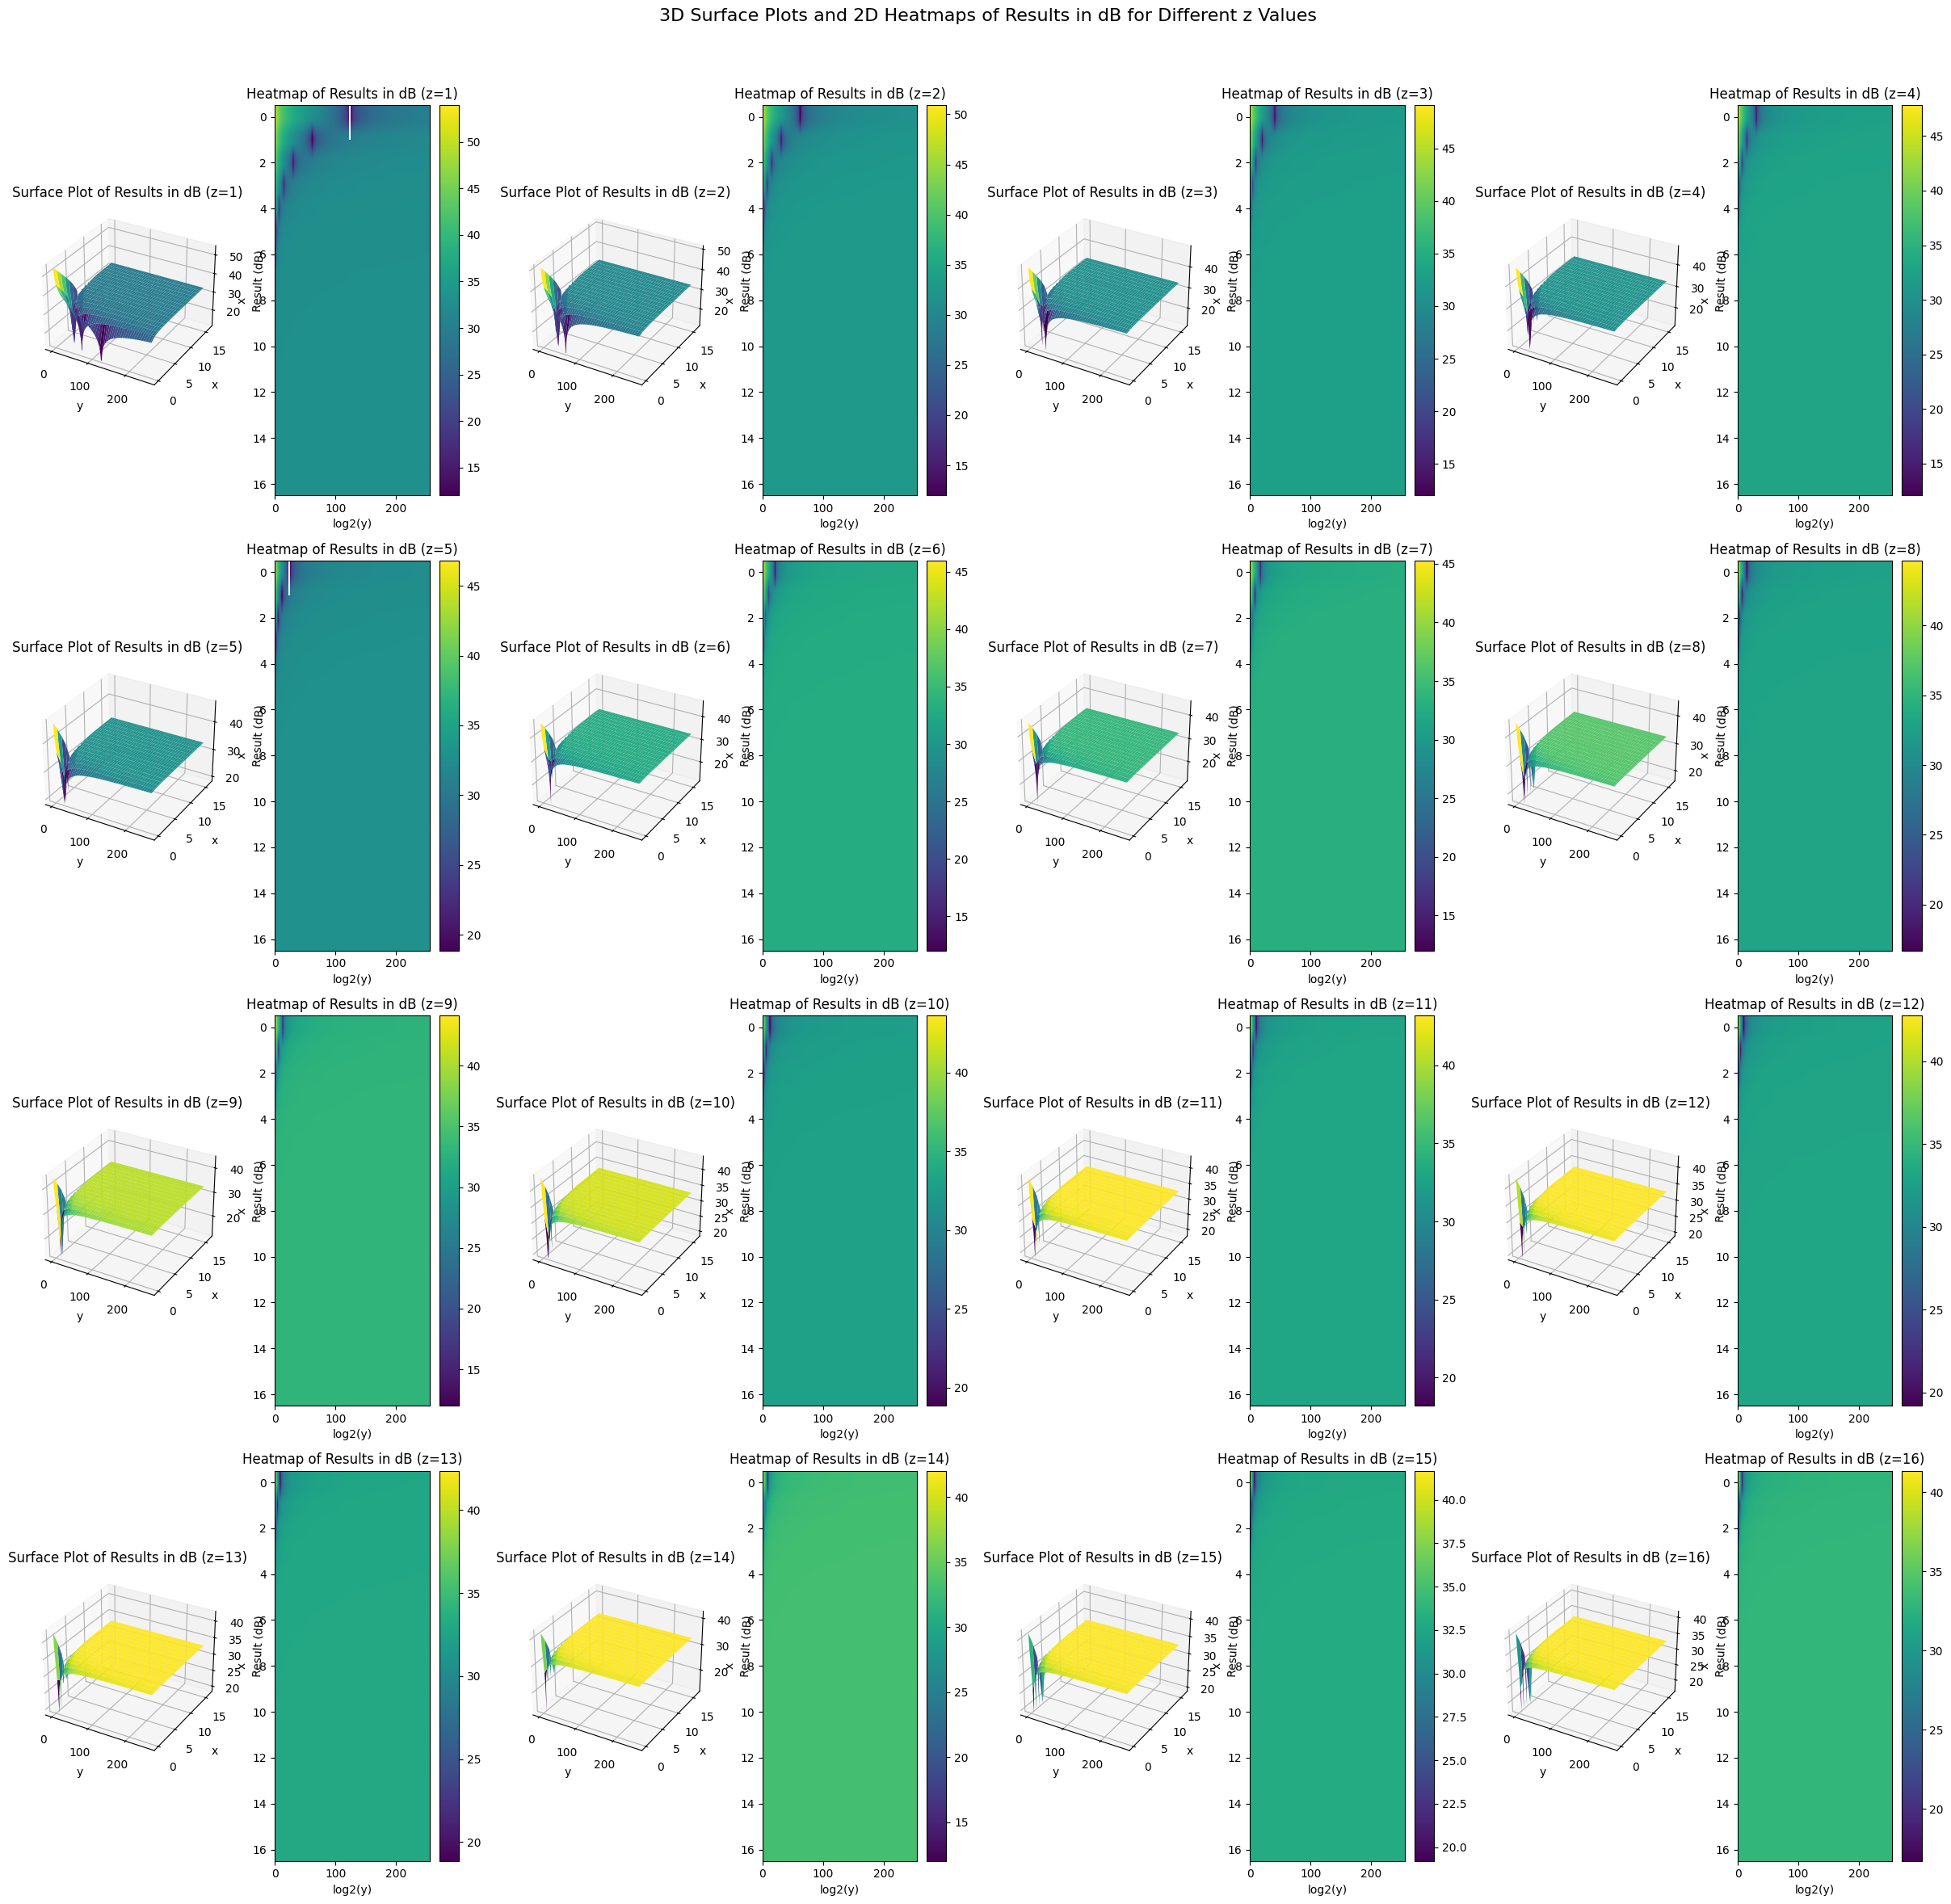

C:\Users\hehey\AppData\Local\Temp\ipykernel_39272\1264984958.py:95: RuntimeWarning: divide by zero encountered in log10
  percentage_results_db = 10 * np.log10(percentage_results)


Minimum percentage dB value: -inf
Minimum percentage value: 0.0
Corresponding x: 0
Corresponding y: 25 (log2(y) = 4.643856189774724)
Corresponding z: 5


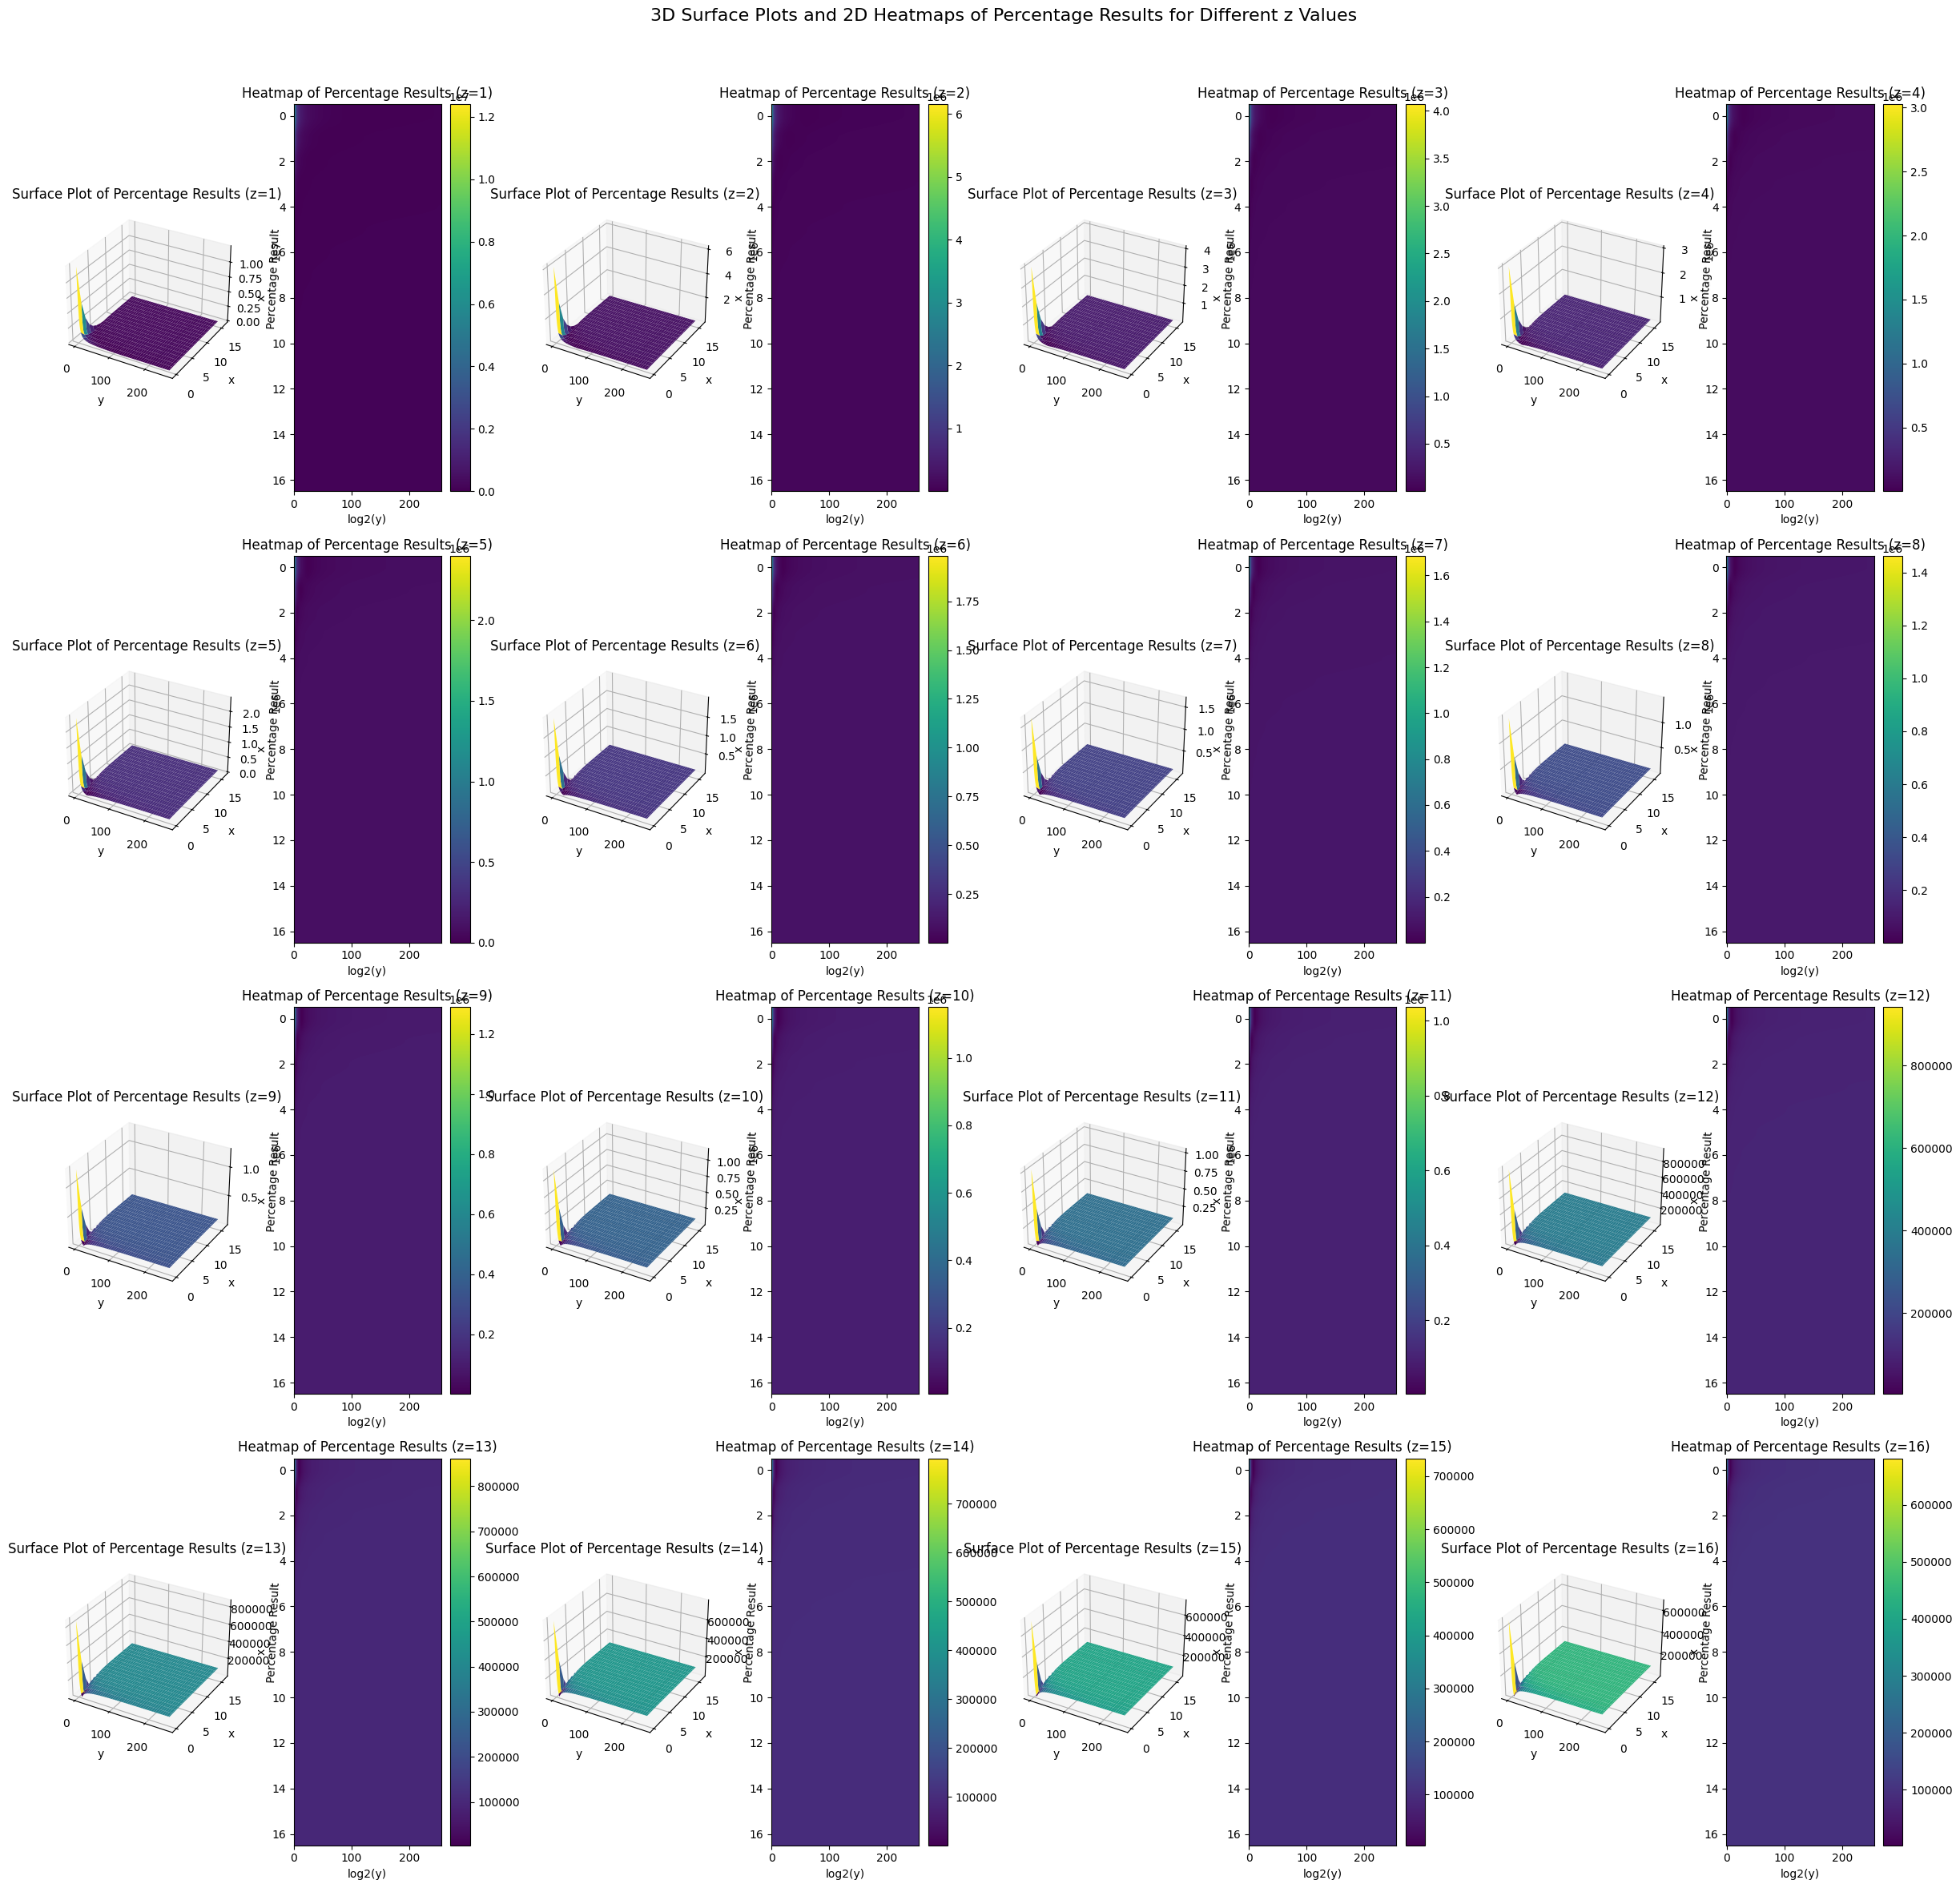

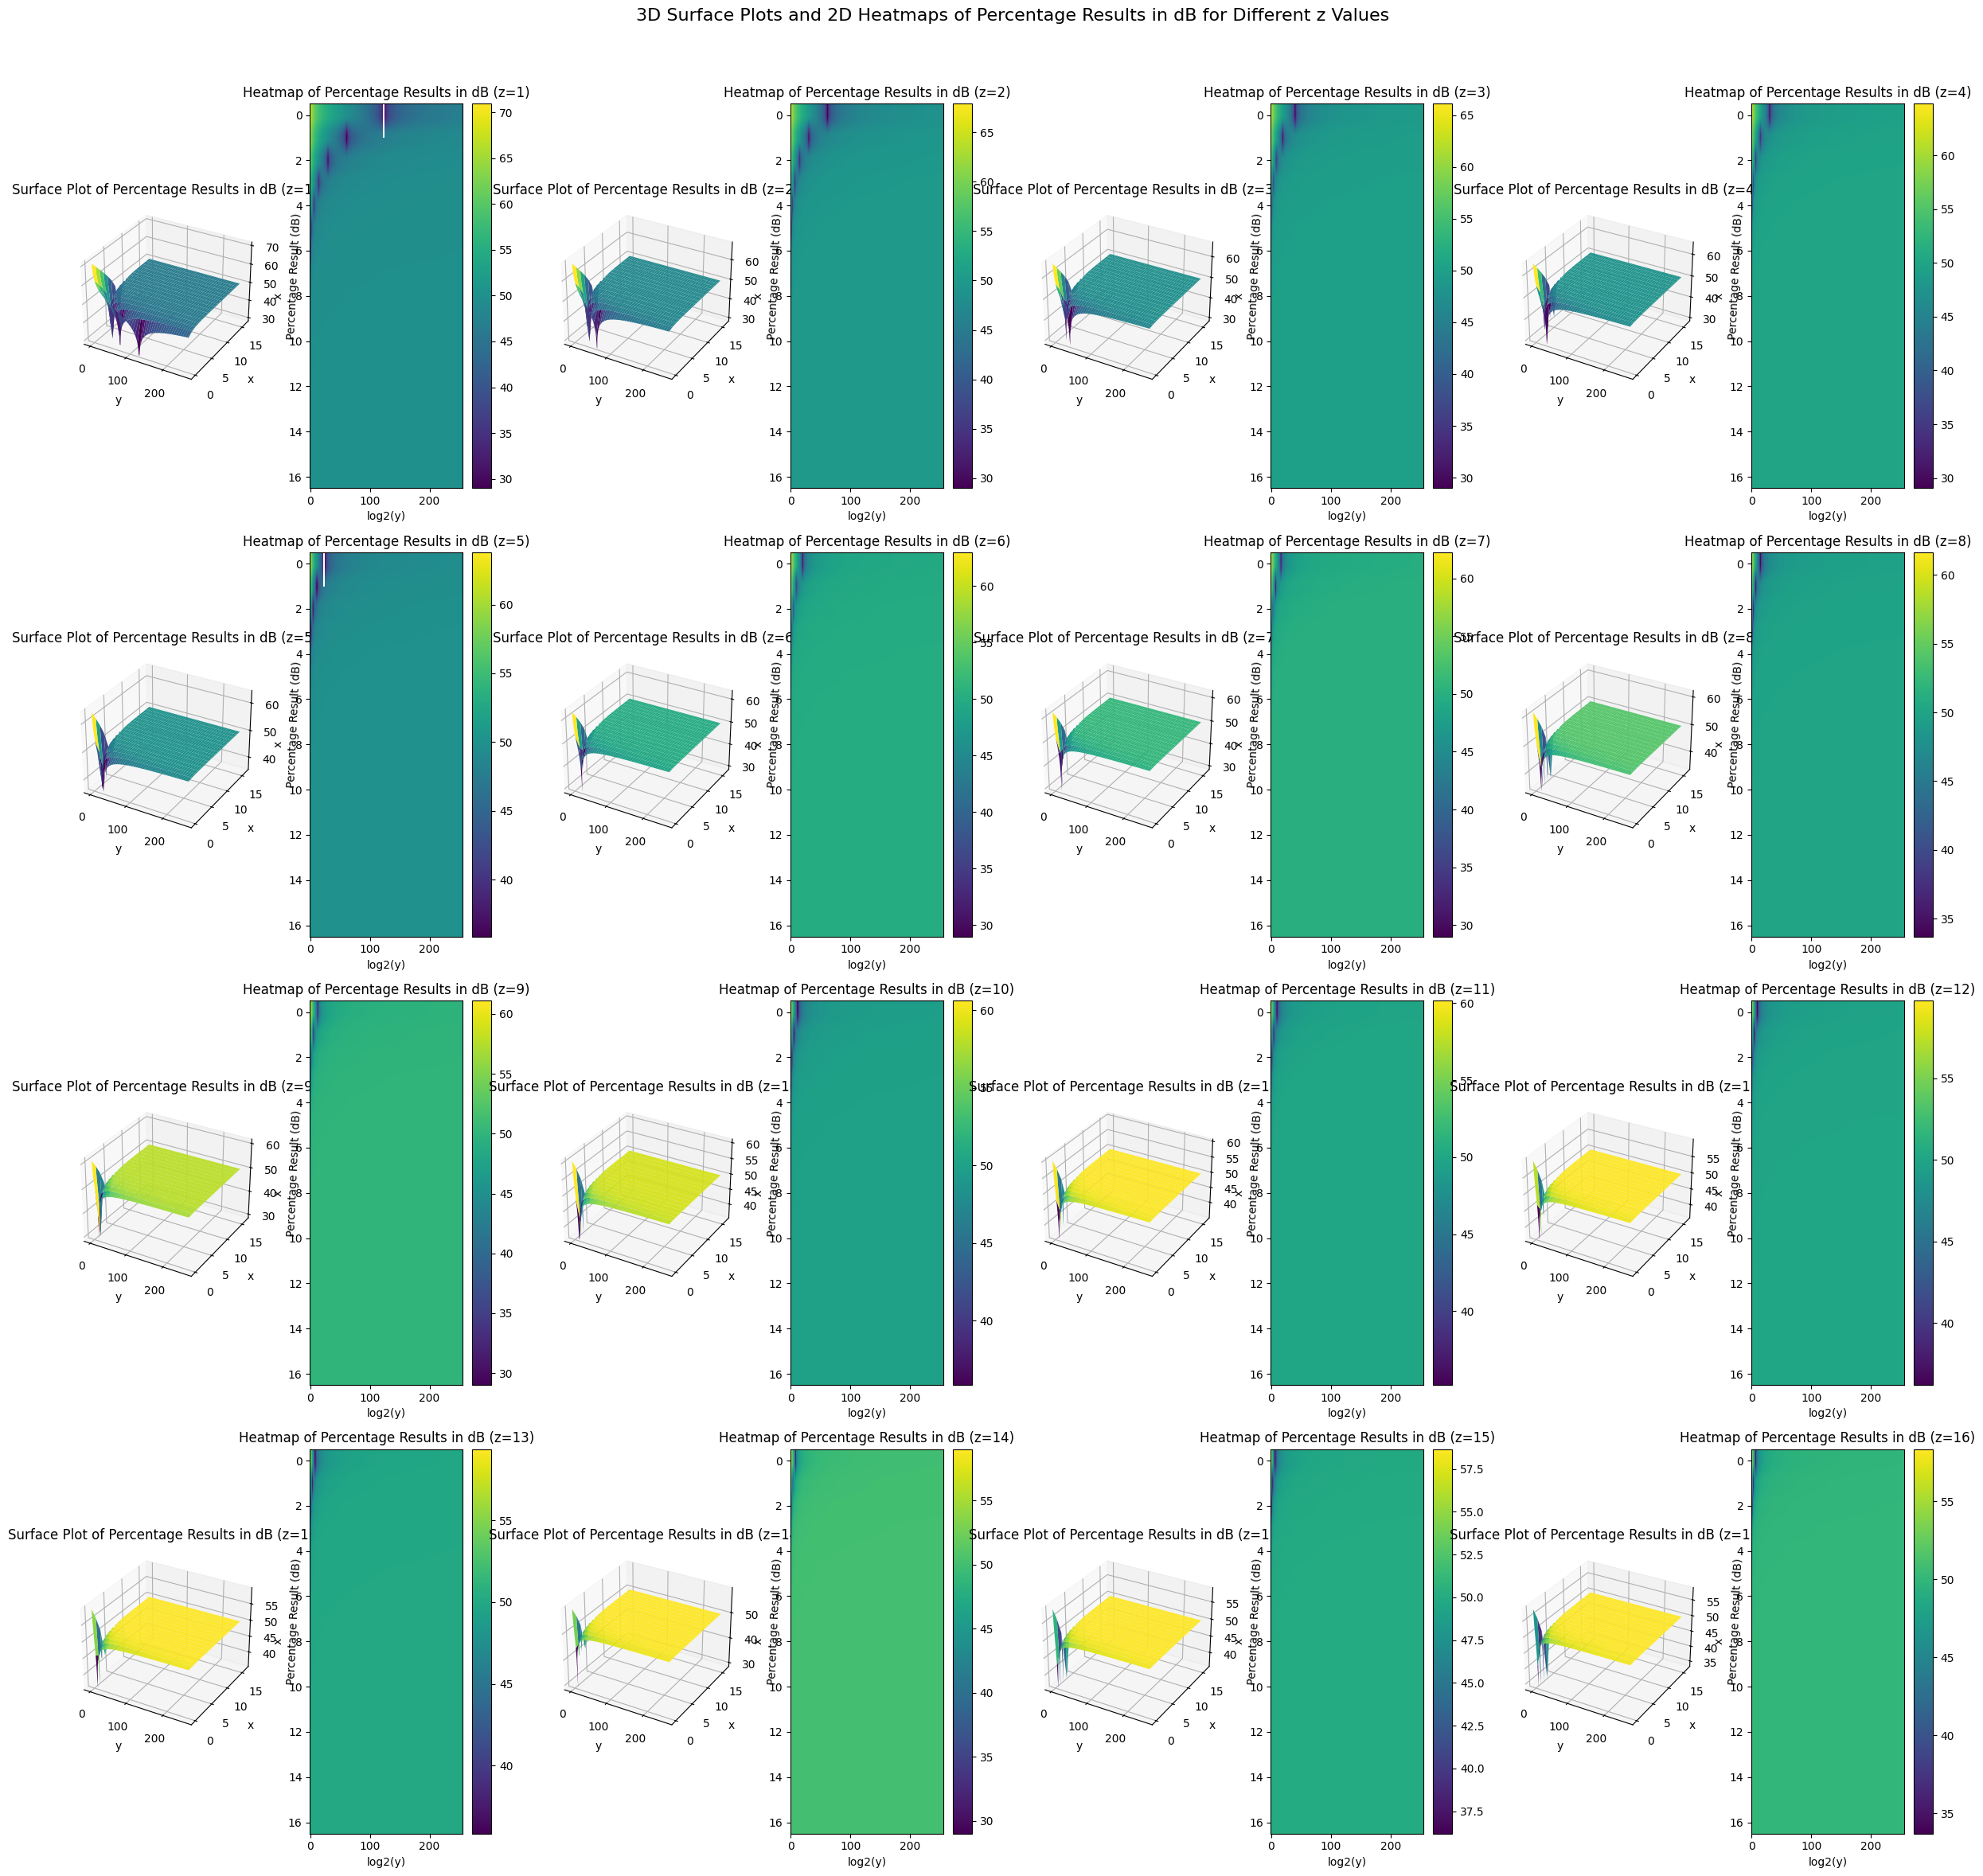

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义 x, y, z 的范围
x_values = np.arange(0, 17)
y_values = np.arange(1, 257)
z_values = np.arange(1, 17)

# 初始化结果数组
results = np.zeros((len(x_values), len(y_values), len(z_values)))

# 计算结果
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        for k, z in enumerate(z_values):
            result = abs((1 * 10**6 / 4) / 2**x / y / z - 2000)
            results[i, j, k] = result

# 将结果转换为分贝值
results_db = 10 * np.log10(results)

# 找出分贝值最小的点
min_db_value = np.min(results_db)
min_db_index = np.unravel_index(np.argmin(results_db), results_db.shape)
min_x = x_values[min_db_index[0]]
min_y = y_values[min_db_index[1]]
min_z = z_values[min_db_index[2]]
min_log2_y = np.log2(min_y)  # 定义min_log2_y变量

# 打印最小分贝值及其对应的x, y, z
print(f"Minimum dB value: {min_db_value}")
print(f"Corresponding x: {min_x}")
print(f"Corresponding y: {min_y} (log2(y) = {min_log2_y})")
print(f"Corresponding z: {min_z}")

# 可视化
fig = plt.figure(figsize=(24, 24))

# 绘制每个 z 值的 3D 曲面图和 2D 热力图
for k, z in enumerate(z_values):
    ax1 = fig.add_subplot(4, 8, k*2+1, projection='3d')
    X, Y = np.meshgrid(y_values, x_values)
    Z = results[:, :, k]
    ax1.plot_surface(X, Y, Z, cmap='viridis')
    ax1.set_title(f'Surface Plot of Results (z={z})')
    ax1.set_xlabel('y')
    ax1.set_ylabel('x')
    ax1.set_zlabel('Result')

    ax2 = fig.add_subplot(4, 8, k*2+2)
    heatmap = ax2.imshow(results[:, :, k], cmap='viridis', aspect='auto')
    ax2.set_title(f'Heatmap of Results (z={z})')
    ax2.set_xlabel('log2(y)')
    ax2.set_ylabel('x')
    fig.colorbar(heatmap, ax=ax2, orientation='vertical')

fig.suptitle('3D Surface Plots and 2D Heatmaps of Results for Different z Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 可视化分贝值
fig = plt.figure(figsize=(24, 24))

# 绘制每个 z 值的 3D 曲面图和 2D 热力图
for k, z in enumerate(z_values):
    ax1 = fig.add_subplot(4, 8, k*2+1, projection='3d')
    X, Y = np.meshgrid(y_values, x_values)
    Z_db = results_db[:, :, k]
    ax1.plot_surface(X, Y, Z_db, cmap='viridis')
    ax1.set_title(f'Surface Plot of Results in dB (z={z})')
    ax1.set_xlabel('y')
    ax1.set_ylabel('x')
    ax1.set_zlabel('Result (dB)')

    ax2 = fig.add_subplot(4, 8, k*2+2)
    heatmap_db = ax2.imshow(results_db[:, :, k], cmap='viridis', aspect='auto')
    ax2.set_title(f'Heatmap of Results in dB (z={z})')
    ax2.set_xlabel('log2(y)')
    ax2.set_ylabel('x')
    fig.colorbar(heatmap_db, ax=ax2, orientation='vertical')

fig.suptitle('3D Surface Plots and 2D Heatmaps of Results in dB for Different z Values', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 保存结果到csv文件
np.savetxt("results.csv", results.reshape(-1, len(z_values)), delimiter=",")
np.savetxt("results_db.csv", results_db.reshape(-1, len(z_values)), delimiter=",")

# 计算每个 result/2 的百分比
percentage_results = results / 2 * 100

# 将百分比结果转换为分贝值
percentage_results_db = 10 * np.log10(percentage_results)

# 找出百分比分贝值最小的点
min_percentage_db_value = np.min(percentage_results_db)
min_percentage_db_index = np.unravel_index(
    np.argmin(percentage_results_db), percentage_results_db.shape
)
min_x_percentage = x_values[min_percentage_db_index[0]]
min_y_percentage = y_values[min_percentage_db_index[1]]
min_z_percentage = z_values[min_percentage_db_index[2]]
min_log2_y_percentage = np.log2(min_y_percentage)  # 定义min_log2_y_percentage变量

# 打印最小分贝值及其对应的x, y, z
print(f"Minimum percentage dB value: {min_percentage_db_value}")
print(f"Minimum percentage value: {percentage_results[min_percentage_db_index]}")
print(f"Corresponding x: {min_x_percentage}")
print(f"Corresponding y: {min_y_percentage} (log2(y) = {min_log2_y_percentage})")
print(f"Corresponding z: {min_z_percentage}")

# 可视化
fig = plt.figure(figsize=(24, 24))

# 绘制每个 z 值的 3D 曲面图和 2D 热力图
for k, z in enumerate(z_values):
    ax1 = fig.add_subplot(4, 8, k * 2 + 1, projection="3d")
    X, Y = np.meshgrid(y_values, x_values)
    Z_percentage = percentage_results[:, :, k]
    ax1.plot_surface(X, Y, Z_percentage, cmap="viridis")
    ax1.set_title(f"Surface Plot of Percentage Results (z={z})")
    ax1.set_xlabel("y")
    ax1.set_ylabel("x")
    ax1.set_zlabel("Percentage Result")

    ax2 = fig.add_subplot(4, 8, k * 2 + 2)
    heatmap_percentage = ax2.imshow(Z_percentage, cmap="viridis", aspect="auto")
    ax2.set_title(f"Heatmap of Percentage Results (z={z})")
    ax2.set_xlabel("log2(y)")
    ax2.set_ylabel("x")
    fig.colorbar(heatmap_percentage, ax=ax2, orientation="vertical")

fig.suptitle(
    "3D Surface Plots and 2D Heatmaps of Percentage Results for Different z Values",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 可视化分贝值
fig = plt.figure(figsize=(24, 24))

# 绘制每个 z 值的 3D 曲面图和 2D 热力图
for k, z in enumerate(z_values):
    ax1 = fig.add_subplot(4, 8, k * 2 + 1, projection="3d")
    X, Y = np.meshgrid(y_values, x_values)
    Z_percentage_db = percentage_results_db[:, :, k]
    ax1.plot_surface(X, Y, Z_percentage_db, cmap="viridis")
    ax1.set_title(f"Surface Plot of Percentage Results in dB (z={z})")
    ax1.set_xlabel("y")
    ax1.set_ylabel("x")
    ax1.set_zlabel("Percentage Result (dB)")

    ax2 = fig.add_subplot(4, 8, k * 2 + 2)
    heatmap_percentage_db = ax2.imshow(Z_percentage_db, cmap="viridis", aspect="auto")
    ax2.set_title(f"Heatmap of Percentage Results in dB (z={z})")
    ax2.set_xlabel("log2(y)")
    ax2.set_ylabel("x")
    fig.colorbar(heatmap_percentage_db, ax=ax2, orientation="vertical")

fig.suptitle(
    "3D Surface Plots and 2D Heatmaps of Percentage Results in dB for Different z Values",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
